In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

try: # When on google Colab, let's clone the notebook so we download the cache.
    import google.colab
    repo_path = 'dspy'
    !git -C $repo_path pull origin || git clone https://github.com/stanfordnlp/dspy $repo_path
except:
    repo_path = '.'

if repo_path not in sys.path:
    sys.path.append(repo_path)

# Set up the cache for this notebook
os.environ["DSP_NOTEBOOK_CACHEDIR"] = os.path.join(repo_path, 'cache')

import pkg_resources # Install the package if it's not installed
if not "dspy-ai" in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install -U pip
    !pip install dspy-ai
    # !pip install -e $repo_path

import dspy

/tmp/ipykernel_1854946/1818627631.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources # Install the package if it's not installed


In [2]:
from dspy.datasets.gsm8k import GSM8K

gsm8k = GSM8K()
gsm8k.train = gsm8k.train[:30]
gsm8k.dev = gsm8k.dev[:25]
example_descriptions = {'inputs': {'question': "grade school math word problem"}, 'outputs': {'answer': 'answer to a math problem'}}

HF google storage unreachable. Downloading and preparing it from source


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

100%|██████████| 1319/1319 [00:00<00:00, 59789.76it/s]


In [3]:
from dspy.evaluate.evaluate import Evaluate
from dspy.datasets.gsm8k import gsm8k_metric

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_on_gsm8k = Evaluate(devset=gsm8k.dev, num_threads=1, display_progress=True, display_table=10, metric=gsm8k_metric)

# Evaluate the `compiled_rag` program with the `answer_exact_match` metric.
metric = gsm8k_metric

In [4]:
from llama_cpp import Llama

llama = Llama(model_path='openhermes-2.5-mistral-7b.Q4_K_M.gguf', n_ctx=3900, n_gpu_layers=35, chat_format="chatml", verbose=False)
lm = dspy.dsp.modules.LlamaCpp(model='openhermes-2.5-mistral-7b.Q4_K_M', llama_model=llama, model_type='chat')
colbertv2_wiki17_abstracts = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

dspy.settings.configure(lm=lm, rm=colbertv2_wiki17_abstracts)

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

['__init__.py', 'model_backends.py', 'hf_tasks.py', 'json_schema_to_grammar.py', 'tests', '.pytest_cache', '__pycache__', 'constants.py', 'autogoal_core', 'algorithms.py', 'algorithms_base.py', 'auto_dspy.py', 'signatures.py', 'utils.py', 'test_notebook.ipynb', 'my_field.py', 'assertion.log', 'local_cache', 'cache', 'zephyr-7b-beta.Q5_K_M.gguf', 'memory.py', 'prompts.py', 'measure_time.txt', 'measure_time2.txt', 'exceptions.txt', 'test_g8mk.ipynb', 'run_gsm8k.py', 'test_imdb.ipynb', 'imdb.py', 'openhermes-2.5-mistral-7b.Q4_K_M.gguf', 'exceptions_hotpot.txt', 'measure_time_hotpot.txt', 'measure_time_hotpot2.txt', 'exceptions_hotpot2.txt', 'exceptions_gsm8k.txt', 'measure_time_gsm8k.txt', 'measure_time_gsm8k_2.txt', 'exceptions_gsm8k.txt_2', 'exceptions_imdb.txt', 'measure_time_imdb.txt', 'measure_time_hotpot_definitive.txt']


llama_new_context_with_model: KV self size  =  487.50 MiB, K (f16):  243.75 MiB, V (f16):  243.75 MiB
llama_build_graph: non-view tensors processed: 676/676
llama_new_context_with_model: compute buffer total size = 278.56 MiB


In [5]:

# class CodeGenerator(dspy.Signature):
#     """Generate code that solves a problem or answer a question"""

#     instruction = dspy.InputField(desc="problem or question that can be solve through programming")
#     answer = dspy.OutputField()

# class SimpleGsm8k(dspy.Module):
#     def __init__(self):
#         super().__init__()
#         self.generate_answer = dspy.ChainOfThought(CodeGenerator)
    
#     def forward(self, question):
#         prediction = self.generate_answer(instruction=question)
#         return dspy.Prediction(answer=prediction.answer)
    
# from dspy.teleprompt import BootstrapFewShot


# # Set up a basic teleprompter, which will compile our RAG program.
# teleprompter = BootstrapFewShot(metric=gsm8k_metric)

# # Compile!
# compiled_rag = teleprompter.compile(SimpleGsm8k(), trainset=gsm8k.train)

In [6]:
# evaluate_on_gsm8k(compiled_rag, metric=gsm8k_metric)

In [7]:
from auto_dspy import AutoDspy
from autogoal_core.search import PESearch
# import dspy

./cache/compiler


In [8]:
# lm = dspy.OpenAI(model="ollama/openhermes2.5-mistral:7b-q5_K_M", api_base="http://0.0.0.0:8000", api_key='anything', model_type='chat')
# colbertv2_wiki17_abstracts = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

# dspy.settings.configure(lm=lm, rm=colbertv2_wiki17_abstracts)

auto_ds = AutoDspy(
    lm=lm,
    path_to_llm="zephyr-7b-beta.Q5_K_M.gguf",
    search_algorithm=PESearch,
    metric=gsm8k_metric,
    random_state = 42,
    evaluator=evaluate_on_gsm8k

) 

pipeline space DspyPipelineSpace(graph=<autogoal_core.grammar._graph.Graph object at 0x7fee14986320>, path_to_llm='zephyr-7b-beta.Q5_K_M.gguf', examples_description={'inputs': {'question': 'grade school math word problem'}, 'outputs': {'answer': 'answer to a math problem'}})


100%|██████████| 30/30 [00:06<00:00,  4.43it/s]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,"Paranki Lagoon Conservation Park | … was a significant feeding ground for waterbirds and waders in the South East. Because it is fed by groundwater,...",❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,Annette's Perfect Cleanser Company | Annette's Perfect Cleanser Company was a 1930s era firm which manufactured a dry powder which was useful for removing spots...,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,"Packraft | Packraft and trail boat are colloquial terms for a small, portable inflatable boat designed for use in all bodies of water, including technical...",❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,"The Unfortunates | The Unfortunates is an experimental ""book in a box"" published in 1969 by English author B. S. Johnson and reissued in 2008...",❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,"Zack Hample | Zachary Ben Hample (born September 14, 1977), known as Zack Hample, is a Major League baseball collector. He is known for his...",❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,"BlueSky Charter School | BlueSky was the first charter school in Minnesota to be completely online, following on from Mindquest, which was the first online...",❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,"PLOS ONE | PLOS ONE (originally ""PLoS ONE"") is a peer-reviewed open access scientific journal published by the Public Library of Science (PLOS) since 2006....",❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,Great grain robbery | The great grain robbery was the July 1972 purchase of 10 million tons of United States grain (mainly wheat and corn)...,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,"Dusty the Klepto Kitty | Dusty the Klepto Kitty is a domestic Snowshoe cat who gained notoriety in early 2011 for his acts of ""burglary.""...",❌ [False]
9,Trey is raising mo

100%|██████████| 30/30 [23:59<00:00, 47.97s/it]


Bootstrapped 3 full traces after 30 examples in round 0.


Average Metric: 2 / 25  (8.0): 100%|██████████| 25/25 [17:53<00:00, 42.93s/it] 


Average Metric: 2 / 25  (8.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,In which country is Paris located and what language do they speak there?,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,"Are you referring to the ages of two individuals, or is there a specific context related to the numbers 28 or 29?",❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,In which country is Paris located and what language do they speak there?,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,In which country is Paris located and what language do they speak there?,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,What is the capital city of France? Reasoning: Let's think step by step in order to identify the capital city of France. We know that...,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,What does the number 6 represent in this context?,✔️ [True]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,What is the capital city of France? Reasoning: Let's think step by step in order to identify the capital city of France. We know that...,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,What is the main subject and action in this text?,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,What is the capital city of France? Reasoning: Let's think step by step in order to identify the capital city of France. We know that...,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,What was the purpose of construct,❌ [False]


 83%|████████▎ | 25/30 [20:35<04:07, 49.42s/it]


Bootstrapped 4 full traces after 26 examples in round 0.


Average Metric: 2 / 25  (8.0): 100%|██████████| 25/25 [18:18<00:00, 43.95s/it] 


Average Metric: 2 / 25  (8.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,Paris,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,28 or 29,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,Paris,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,Paris,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,Paris Question: How many days are in a year? Reasoning: Let's think step by step in order to determine how many days are in a...,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,6,✔️ [True]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,Paris Question: How many days are in a year? Reasoning: Let's think step by step in order to determine the number of days in a...,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,20 Question: How much money does Burt make from selling one basil plant? Answer: $5.00 Question: What is the total revenue Burt makes from selling...,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,Paris Question: How many days are in a week? Reasoning: Let's think step by step in order to determine how many days are in a...,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,14 Question: How much money does Trey need to make from selling bracelets? Answer: $112 Question: What is the average number of bracelets he needs...,❌ [False]


100%|██████████| 30/30 [52:31<00:00, 105.05s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [44:26<00:00, 106.67s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,H,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,H,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,H,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,H,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,Not enough information provided for summary generation. Please provide more context or text.,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,H,❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,H,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,"W (The given text ""W"" is too short to summarize effectively. Please provide a longer text for summarization.)",❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,H,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,H,❌ [False]


100%|██████████| 30/30 [15:52<00:00, 31.75s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [13:34<00:00, 32.56s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,H,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,H,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,H,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,H,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,h,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,H,❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,H,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,W,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,H,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,H,❌ [False]


100%|██████████| 30/30 [35:39<00:00, 71.33s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [28:30<00:00, 68.40s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,"Wingspan | The wingspan (or just span) of a bird or an airplane is the distance from one wingtip to the other wingtip. For example,...",❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,Medicare Part D coverage gap | The Medicare Part D coverage gap (informally known as the Medicare donut hole) is a period of consumer payment...,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,"Karena Albers | Karena Albers, is co-ounder of WHOLE WORLD Water, a social enterprise that unites the Hospitality & Tourism Industry to raise million, if...",❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,The Fifth Chapter | The Fifth Chapter (also stylized as T5C) is the seventeenth studio album by German band Scooter released on 26 September 2014.,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,"Carla Tortelli | Carla Maria Victoria Angelina Teresa Apollonia Lozupone Tortelli LeBec, commonly known as Carla Tortelli, is a waitress on the American television show...",❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,"Shomprakash Sinha Roy | Shomprakash Sinha Roy (Born ""Shomprakash Asit Baran Anil Baran Sinha Roy"") is an author of contemporary fiction and non-fiction, based in...",❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,"Duncan Cameron (photographer) | Duncan Cameron (1928–1985) was a Canadian photojournalist. Cameron was born in Glasgow, Scotland, but emigrated to Ottawa, Ontario, Canada in 1954....",❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,"Basilinda | Basilinda is a board game that was created by George Howard Monks, the author of Halma. Basilinda was first published and manufactured in...",❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,Martha (solitaire) | Martha is a solitaire card game that is played with a deck of 52 playing cards. It has a novelty of having...,❌ [False]
9

100%|██████████| 30/30 [05:32<00:00, 11.08s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [04:29<00:00, 10.80s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,2,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,W,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,K,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,R,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,B,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,R,❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,C,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,B,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,C,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,T,❌ [False]


100%|██████████| 30/30 [38:16<00:00, 76.54s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [31:13<00:00, 74.94s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,"Pacific Flyway | The Pacific Flyway is a major north-south flyway for migratory birds in America, extending from Alaska to Patagonia. Every year, migratory birds...",❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,Anna Ayala | Anna Ayala (born 22 December 1965) is an American woman infamous for bringing a fraudulent tort lawsuit against a Wendy's restaurant in...,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,"Karena Albers | Karena Albers, is co-ounder of WHOLE WORLD Water, a social enterprise that unites the Hospitality & Tourism Industry to raise million, if...",❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,"Al-Ma'ida | Surat al-Māʼida (Arabic: سورة المائدة‎ ‎ , ""The Table"" or ""The Table Spread with Food"") is the fifth chapter of the Quran, with...",❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,"Carla Tortelli | Carla Maria Victoria Angelina Teresa Apollonia Lozupone Tortelli LeBec, commonly known as Carla Tortelli, is a waitress on the American television show...",❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,"Shomprakash Sinha Roy | Shomprakash Sinha Roy (Born ""Shomprakash Asit Baran Anil Baran Sinha Roy"") is an author of contemporary fiction and non-fiction, based in...",❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,"Duncan Cameron (photographer) | Duncan Cameron (1928–1985) was a Canadian photojournalist. Cameron was born in Glasgow, Scotland, but emigrated to Ottawa, Ontario, Canada in 1954....",❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,"Gardens Alive! | Gardens Alive! , Inc. is a privately owned multi-title catalog company founded in 1984. It sells garden and lawn supplies, specializing in...",❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,"Longfin crevalle jack | The longfin crevalle jack, ""Caranx fischeri"", is a recently described 

 83%|████████▎ | 25/30 [11:00<02:12, 26.41s/it]


Bootstrapped 4 full traces after 26 examples in round 0.


Average Metric: 2 / 25  (8.0): 100%|██████████| 25/25 [09:55<00:00, 23.82s/it] 


Average Metric: 2 / 25  (8.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,Paris,❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,28 or 29,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,Paris,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,Paris,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,Paris Question: How many days are in a year? Reasoning: Let's think step by step in order to determine how many days are in a...,❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,6,✔️ [True]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,Paris Question: How many days are in a year? Reasoning: Let's think step by step in order to determine the number of days in a...,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,20 Question: How much money does Burt make from selling one basil plant? Answer: $5.00 Question: What is the total revenue Burt makes from selling...,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,Paris Question: How many days are in a week? Reasoning: Let's think step by step in order to determine how many days are in a...,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,14 Question: How much money does Trey need to make from selling bracelets? Answer: $112 Question: What is the average number of bracelets he needs...,❌ [False]


 27%|██▋       | 8/30 [04:13<11:37, 31.71s/it]


Bootstrapped 4 full traces after 9 examples in round 0.


Average Metric: 11 / 25  (44.0): 100%|██████████| 25/25 [13:54<00:00, 33.37s/it]


Average Metric: 11 / 25  (44.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,1000 + 1200 = 2200 miles,✔️ [True]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,$190,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,34,✔️ [True]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,8,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,26,✔️ [True]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,6,✔️ [True]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,360,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,$80,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,47,✔️ [True]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,"112 Reasoning: To raise money for a bike that costs $112, Trey needs to sell enough bracelets to make that amount. Question: How many days...",❌ [False]


  0%|          | 0/30 [00:00<?, ?it/s]Your max_length is set to 142, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)
Your max_length is set to 200, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
  3%|▎         | 1/30 [02:01<58:49, 121.71s/it]Your max_length is set to 142, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 200, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might c

Bootstrapped 4 full traces after 7 examples in round 0.


  0%|          | 0/25 [00:00<?, ?it/s]Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)
Your max_length is set to 200, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Average Metric: 1 / 1  (100.0):   4%|▍         | 1/25 [01:41<40:35, 101.47s/it]Your max_length is set to 142, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 200, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input a

Average Metric: 8 / 25  (32.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,2200,✔️ [True]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,Wendy paid $410 for the tooth,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,38,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,10,❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,26,✔️ [True]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,8,❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,240,✔️ [True]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,$70.00,❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,47,✔️ [True]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,16,❌ [False]


100%|██████████| 30/30 [38:46<00:00, 77.55s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [31:42<00:00, 76.08s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,question,gold_reasoning,example_answer,pred_answer,gsm8k_metric
0,"20 birds migrate on a seasonal basis from one lake to another, searching for food. If they fly from lake Jim to lake Disney in...",The birds' flying distance between Lake Jim through lake Disney to lake London is 50+60 = <<50+60=110>>110 miles. Since each bird flies the 110 miles...,2200,"Calculate average distance per bird in one season, multiply by number of birds, add distances from two seasons for total combined distance.",❌ [False]
1,"Wendy went to the dentist for a cleaning, two fillings, and a tooth extraction. The dentist charges $70 for a cleaning and $120 for a...","Wendy’s dentist bill was 5 * $120 = $<<5*120=600>>600. She got two fillings at a cost of 2 * $120 = $<<2*120=240>>240. Thus, Wendy paid...",290,The text seeks to find out the total cost of Wendy's dental treatment by identifying the specific procedure and factoring in insurance or discounts.,❌ [False]
2,"Karen is packing her backpack for a long-distance hike. She packs 20 pounds of water, 10 pounds of food, and 20 pounds of gear. During...",First find the weight of food Karen eats every hour: 2 pounds * 1/3 = 2/3 pounds food. Then find the total amount of weight...,34,Determine Karen's water consumption and food intake over a six-hour period.,❌ [False]
3,Rita is reading a five-chapter book with 95 pages. Each chapter has three pages more than the previous one. How many pages does the first...,Let P be the number of pages in the first chapter. The second chapter has P + 3 pages. The third chapter has P +...,13,"Determine the number of pages in the fifth chapter by locating it, counting words or lines, and estimating the average words or lines per page.",❌ [False]
4,Benjamin collects 6 dozen eggs a day. Carla collects 3 times the number of eggs that Benjamin collects. Trisha collects 4 dozen less than Benjamin....,Carla:3(6)=18 dozen eggs Trisha: 6-4=<<6-4=2>>2 dozen eggs Total: 6+18+2=<<6+18+2=26>>26 dozen eggs,26,"The text asks for the number of eggs Carla collects daily, but no specific information is provided.",❌ [False]
5,Roy spends 2 hours on sports activities in school every day. He goes to school 5 days a week. If he missed 2 days within...,He goes to.school 5 days a week so if he misses 2 days within the week he was present for 5-2 = <<5-2=3>>3 days He...,6,Roy attended school for 5 days that week.,❌ [False]
6,Cameron is printing her thesis in the school library and has 400 A4 pieces of paper. If 40% of the papers did not print out...,"If she had 400 papers, the total number of documents she separated as invalid is 40/100 * 400 pages = <<40/100*400=160>>160 pages. The number of...",240,Cameron has X valid documents after separating those that did not meet her desired quality.,❌ [False]
7,Burt spent $2.00 on a packet of basil seeds and $8.00 on potting soil. The packet of seeds yielded 20 basil plants. He sells each...,He spent $2.00 on seeds and $8.00 on soil for a total of 2+8 = $<<2+8=10.00>>10.00 He sells each of the 20 basil plants for...,90,"Calculate the net profit of Burt's basil plants by subtracting the total cost (seeds, potting soil, and 20 plants",❌ [False]
8,Martha's cat catches 3 rats and 7 birds. Cara's cat catches 3 less than five times as many animals as Martha's cat. How many animals...,First find the total number of animals Martha's cat catches: 3 rats + 7 birds = <<3+7=10>>10 animals Then multiply that number by 5: 10...,47,Cara's cat catches 5 times as many animals as Martha's cat minus 3.,❌ [False]
9,Trey is raising money for a new bike that costs $112. He plans to spend the next two weeks selling bracelets for $1 each. On...,He needs to sell 112 bracelets because 112 divided by 1 equals <<112/1=112>>112. He has 14 days to sell bracelets because there are seven days...,8,Trey needs,❌ [False]


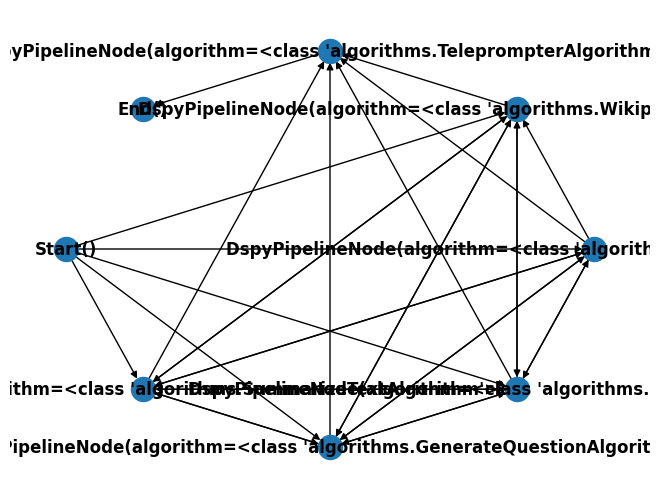

In [9]:
dataset_description = "HotpotQA is a question answering dataset featuring natural, multi-hop questions, with strong supervision for supporting facts to enable more explainable question answering systems."
auto_ds.fit(dataset_description=dataset_description, trainset=gsm8k.train, examples_descriptions=example_descriptions)